Cleaning data...
  Rows per series: 1,814,400  (target ~1,814,400)

Checking data types:
                          commodity exchange instrument_class instrument  \
2023-03-01 00:00:00+00:00    trades     bnus             spot    btc-usd   
2023-03-01 00:00:01+00:00    trades     bnus             spot    btc-usd   
2023-03-01 00:00:02+00:00    trades     bnus             spot    btc-usd   
2023-03-01 00:00:03+00:00    trades     bnus             spot    btc-usd   
2023-03-01 00:00:04+00:00    trades     bnus             spot    btc-usd   

                               open      high       low     close    volume  
2023-03-01 00:00:00+00:00  23144.78  23144.78  23142.18  23142.18  0.363997  
2023-03-01 00:00:01+00:00  23144.78  23144.78  23142.18  23142.18  0.000000  
2023-03-01 00:00:02+00:00  23144.78  23144.78  23142.18  23142.18  0.000000  
2023-03-01 00:00:03+00:00  23140.31  23140.31  23140.31  23140.31  0.003890  
2023-03-01 00:00:04+00:00  23140.32  23140.32  23138.88  23140.3

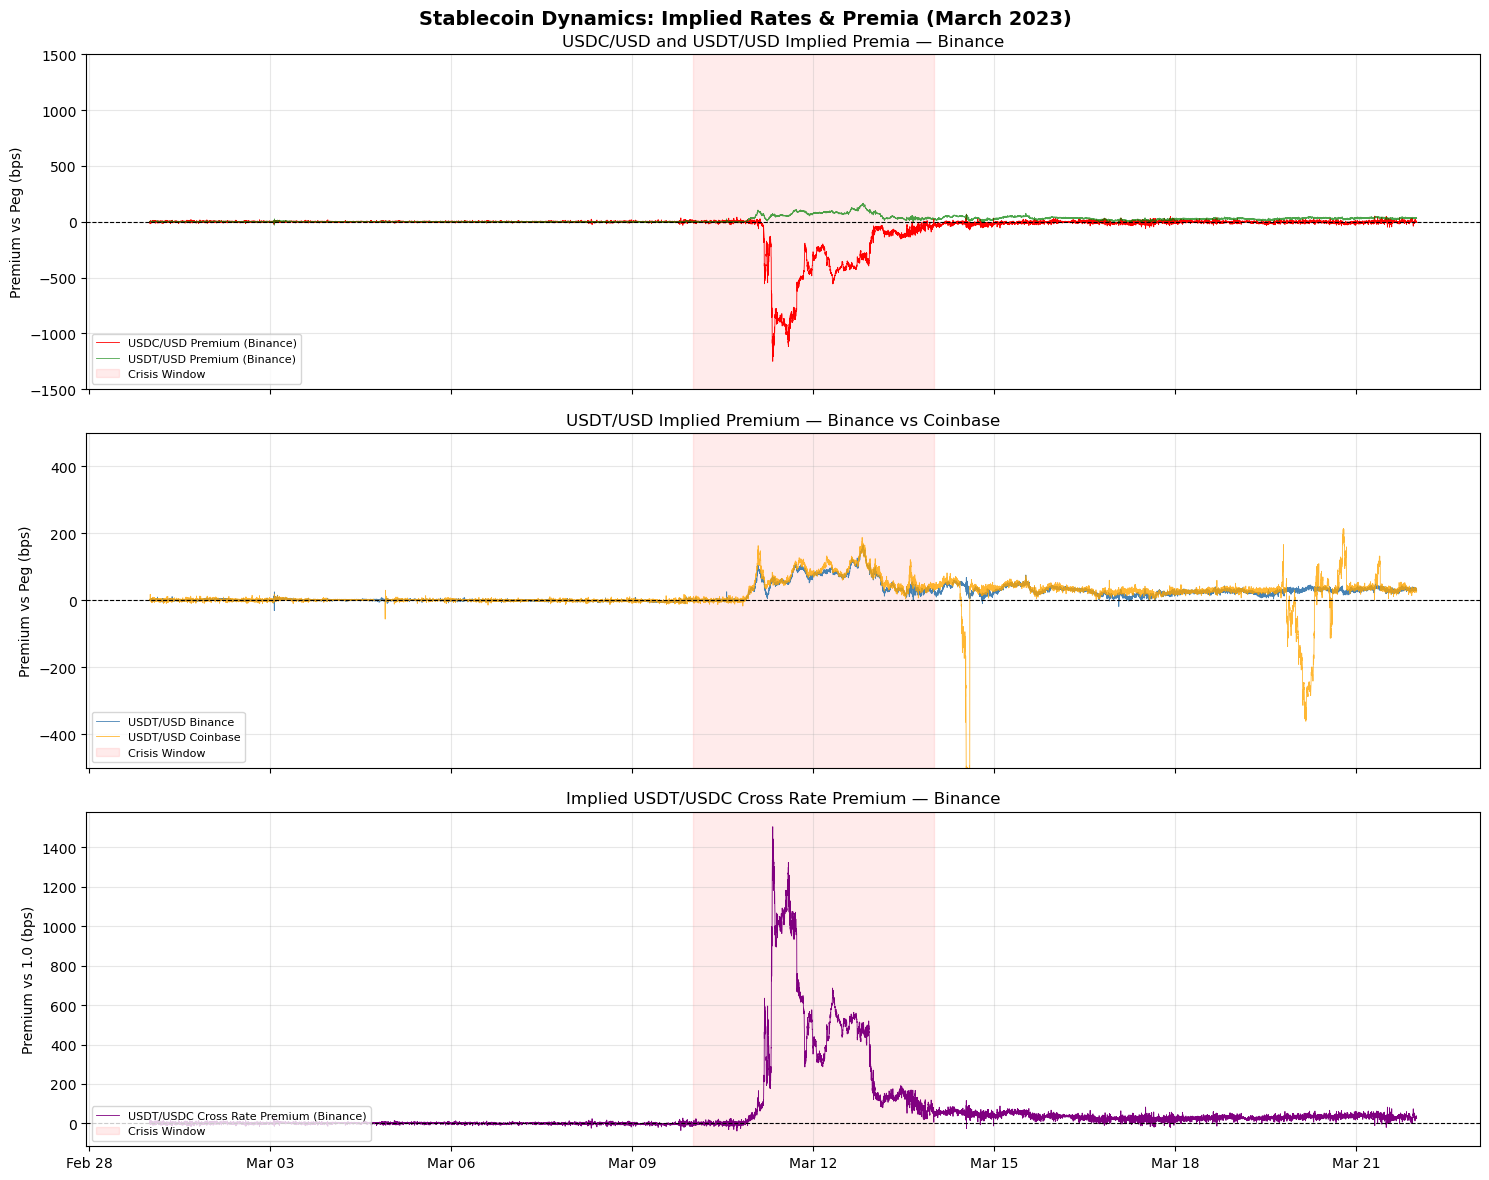

  Saved: stablecoin_premia_overview.png


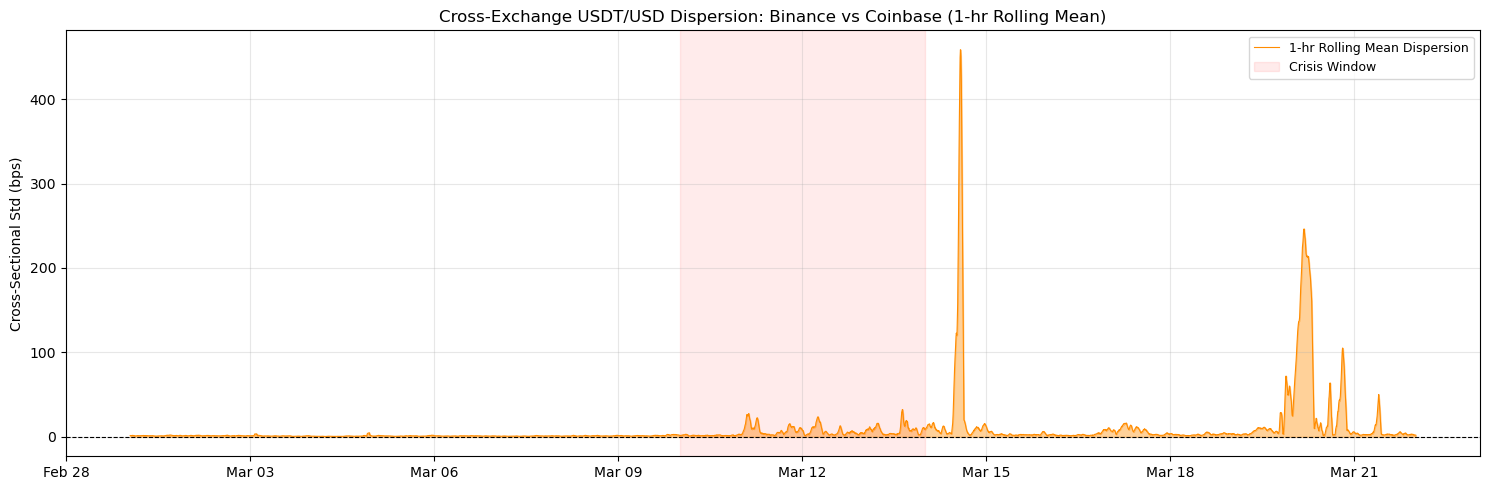

  Saved: cross_exchange_dispersion.png


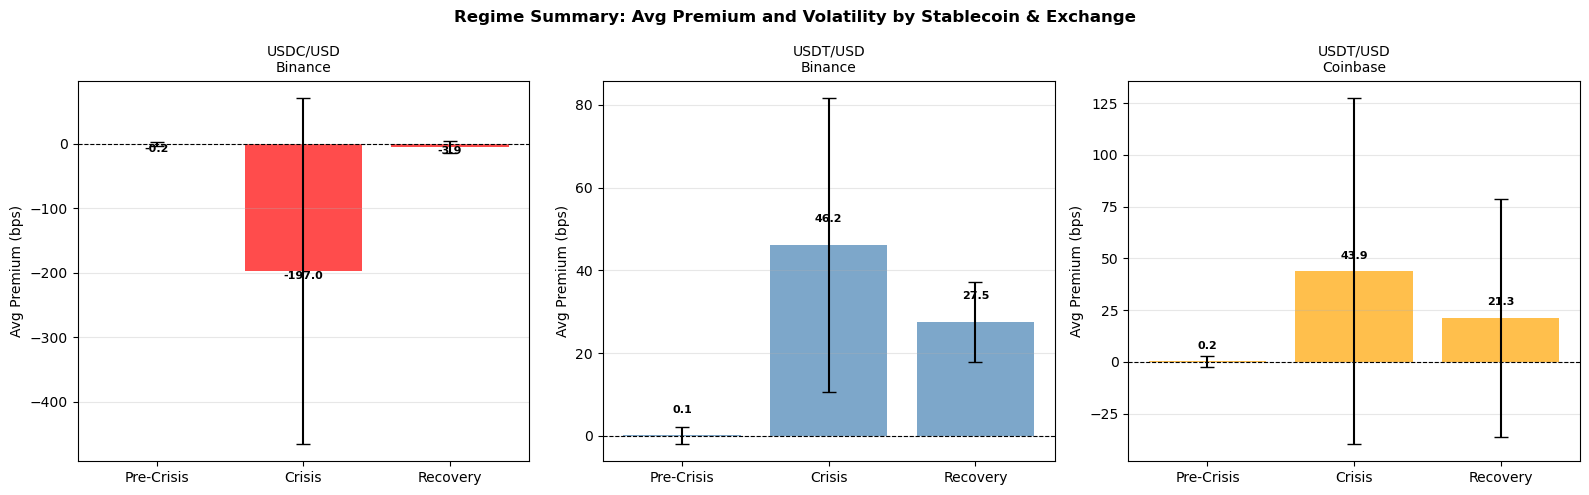

  Saved: regime_bar_chart.png


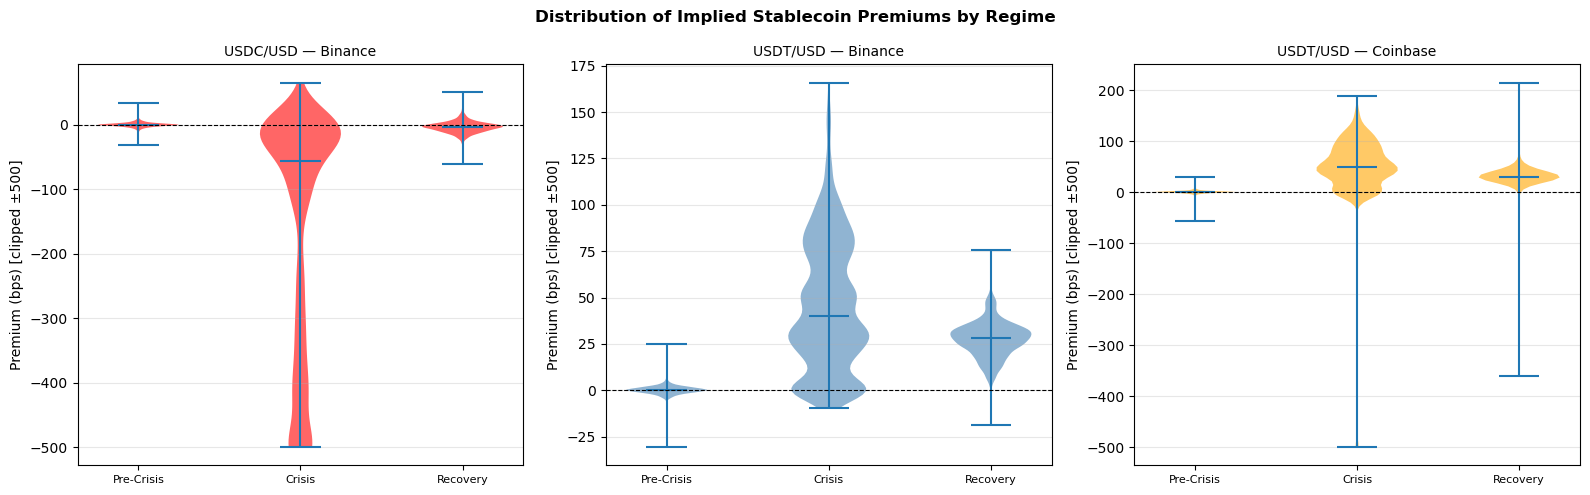

  Saved: regime_distributions.png

════════════════════════════════════════════════════════════
COMPLETE SUMMARY
════════════════════════════════════════════════════════════

Premium Summary Table:
Exchange      Coin               Regime  Avg Premium (bps)  Std Premium (bps)  Min (bps)  Max (bps)  N (minutes)
 Binance  USDC/USD Pre-Crisis (Mar 1–9)            -0.2046             3.6814   -32.3174    34.0537        12960
 Binance  USDC/USD   Crisis (Mar 10–14)          -197.0362           268.6913 -1251.2423    65.2875         7200
 Binance  USDC/USD Recovery (Mar 15–21)            -3.9413             9.3408   -61.6322    50.2217        10080
 Binance  USDT/USD Pre-Crisis (Mar 1–9)             0.1132             2.0872   -30.6158    25.0534        12960
 Binance  USDT/USD   Crisis (Mar 10–14)            46.1724            35.5024    -9.5392   165.8770         7200
 Binance  USDT/USD Recovery (Mar 15–21)            27.5237             9.5715   -18.5003    75.6462        10080
Coinbase  U

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

BASE = '../Data/'

bnus_spot_btc_usd  = pd.read_csv(BASE + 'ohlcv_1s_bnus_spot_btc-usd_2023-03-01T000000000Z_2023-03-21T235959999Z.csv')
bnus_spot_btc_usdc = pd.read_csv(BASE + 'ohlcv_1s_bnus_spot_btc-usdc_2023-03-01T000000000Z_2023-03-21T235959999Z.csv')
bnus_spot_btc_usdt = pd.read_csv(BASE + 'ohlcv_1s_bnus_spot_btc-usdt_2023-03-01T000000000Z_2023-03-21T235959999Z.csv')
cbse_spot_btc_usd  = pd.read_csv(BASE + 'ohlcv_1s_cbse_spot_btc-usd_2023-03-01T000000000Z_2023-03-21T235959999Z.csv')
cbse_spot_btc_usdt = pd.read_csv(BASE + 'ohlcv_1s_cbse_spot_btc-usdt_2023-03-01T000000000Z_2023-03-21T235959999Z.csv')


# After your pd.read_csv() calls, add this function:
def ensure_numeric(df):
    """Convert OHLCV columns to numeric, coercing errors."""
    for col in ['open', 'high', 'low', 'close', 'volume']:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

# Then apply it to all dataframes:
bnus_spot_btc_usd  = ensure_numeric(pd.read_csv(BASE + 'ohlcv_1s_bnus_spot_btc-usd_2023-03-01T000000000Z_2023-03-21T235959999Z.csv'))
bnus_spot_btc_usdc = ensure_numeric(pd.read_csv(BASE + 'ohlcv_1s_bnus_spot_btc-usdc_2023-03-01T000000000Z_2023-03-21T235959999Z.csv'))
bnus_spot_btc_usdt = ensure_numeric(pd.read_csv(BASE + 'ohlcv_1s_bnus_spot_btc-usdt_2023-03-01T000000000Z_2023-03-21T235959999Z.csv'))
cbse_spot_btc_usd  = ensure_numeric(pd.read_csv(BASE + 'ohlcv_1s_cbse_spot_btc-usd_2023-03-01T000000000Z_2023-03-21T235959999Z.csv'))
cbse_spot_btc_usdt = ensure_numeric(pd.read_csv(BASE + 'ohlcv_1s_cbse_spot_btc-usdt_2023-03-01T000000000Z_2023-03-21T235959999Z.csv'))

master_index = pd.date_range("2023-03-01 00:00:00", "2023-03-21 23:59:59",
                              freq='1s', tz='UTC')

def clean_df(df):
    """Parse timestamps, align to 21-day 1-second grid, forward-fill gaps."""
    df = df.copy()
    if 'timestamp' in df.columns:
        if pd.api.types.is_numeric_dtype(df['timestamp']):
            df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms', utc=True)
        else:
            df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)
        df.set_index('timestamp', inplace=True)
    elif not pd.api.types.is_datetime64_any_dtype(df.index):
        if pd.api.types.is_numeric_dtype(df.index):
            df.index = pd.to_datetime(df.index, unit='ms', utc=True)
        else:
            df.index = pd.to_datetime(df.index, utc=True)
    df.sort_index(inplace=True)
    df = df.reindex(master_index).ffill()
    df.dropna(inplace=True)
    return df

print("Cleaning data...")
bnus_usd_clean  = clean_df(bnus_spot_btc_usd)
bnus_usdc_clean = clean_df(bnus_spot_btc_usdc)
bnus_usdt_clean = clean_df(bnus_spot_btc_usdt)
cbse_usd_clean  = clean_df(cbse_spot_btc_usd)
cbse_usdt_clean = clean_df(cbse_spot_btc_usdt)
print(f"  Rows per series: {len(bnus_usd_clean):,}  (target ~1,814,400)")


print("\nChecking data types:")
print(bnus_usd_clean.head())
print(bnus_usd_clean.dtypes)
print(bnus_usd_clean.columns)

# RESAMPLE TO 1-MINUTE (reduces noise for regime stats)

print("\nResampling to 1-minute OHLCV...")
bnus_usd_1m  = bnus_usd_clean['close'].resample('1min').last()
bnus_usdc_1m = bnus_usdc_clean['close'].resample('1min').last()
bnus_usdt_1m = bnus_usdt_clean['close'].resample('1min').last()
cbse_usd_1m  = cbse_usd_clean['close'].resample('1min').last()
cbse_usdt_1m = cbse_usdt_clean['close'].resample('1min').last()

print("Computing implied stablecoin rates...")

# implied_X/USD = BTC_USD / BTC_X   (should equal 1.0 at peg)
implied_usdc_bnus = bnus_usd_1m / bnus_usdc_1m   # Binance USDC/USD
implied_usdt_bnus = bnus_usd_1m / bnus_usdt_1m   # Binance USDT/USD
implied_usdt_cbse = cbse_usd_1m / cbse_usdt_1m   # Coinbase USDT/USD

# Implied USDT/USDC cross rate (Binance only - no Coinbase USDC pair)
# If BTC/USDC = 22000 and BTC/USDT = 21000, then 1 USDT = 22000/21000 USDC
implied_usdt_usdc_bnus = bnus_usdc_1m / bnus_usdt_1m  # USDT in terms of USDC

# Premium / discount vs peg in basis points
# premium_bps > 0 means the stablecoin is trading ABOVE $1 (BTC is "cheaper" in that coin)
# premium_bps < 0 means the stablecoin is trading BELOW $1 (de-peg)
prem_usdc_bnus = (implied_usdc_bnus - 1.0) * 10_000   # bps
prem_usdt_bnus = (implied_usdt_bnus - 1.0) * 10_000   # bps
prem_usdt_cbse = (implied_usdt_cbse - 1.0) * 10_000   # bps

# USDT/USDC premium: deviation from 1.0 in bps
prem_usdt_usdc = (implied_usdt_usdc_bnus - 1.0) * 10_000  # bps


#  REGIME DEFINITIONS

REGIMES = {
    'Pre-Crisis (Mar 1–9)'  : ('2023-03-01', '2023-03-09'),
    'Crisis (Mar 10–14)'    : ('2023-03-10', '2023-03-14'),
    'Recovery (Mar 15–21)'  : ('2023-03-15', '2023-03-21'),
}

def regime_slice(series, start, end):
    return series.loc[start:end].dropna()

# PER EXCHANGE × COIN × REGIME SUMMARY TABLE
print("\n─── STABLECOIN PREMIUM SUMMARY TABLE ───")
print(f"{'Exchange':<12} {'Coin':<10} {'Regime':<25} {'Avg Premium (bps)':>18} {'Std Premium (bps)':>18} {'Min (bps)':>10} {'Max (bps)':>10}")
print("─" * 100)

series_map = [
    ('Binance',  'USDC/USD', prem_usdc_bnus),
    ('Binance',  'USDT/USD', prem_usdt_bnus),
    ('Coinbase', 'USDT/USD', prem_usdt_cbse),
    ('Binance',  'USDT/USDC', prem_usdt_usdc),
]

summary_rows = []
for exchange, coin, series in series_map:
    for regime_name, (start, end) in REGIMES.items():
        sl = regime_slice(series, start, end)
        row = {
            'Exchange'         : exchange,
            'Coin'             : coin,
            'Regime'           : regime_name,
            'Avg Premium (bps)': round(sl.mean(), 4),
            'Std Premium (bps)': round(sl.std(), 4),
            'Min (bps)'        : round(sl.min(), 4),
            'Max (bps)'        : round(sl.max(), 4),
            'N (minutes)'      : len(sl),
        }
        summary_rows.append(row)
        print(f"{exchange:<12} {coin:<10} {regime_name:<25} {sl.mean():>18.4f} {sl.std():>18.4f} {sl.min():>10.2f} {sl.max():>10.2f}")
    print()

summary_df = pd.DataFrame(summary_rows)
summary_df.to_csv('stablecoin_premium_summary.csv', index=False)
print("Summary table saved to stablecoin_premium_summary.csv")


# CROSS-EXCHANGE DISPERSION (USDT/USD)

print("\n─── CROSS-EXCHANGE DISPERSION: USDT/USD (Binance vs Coinbase) ───")

# Align both series to the same index (inner join)
disp_df = pd.DataFrame({
    'bnus': implied_usdt_bnus,
    'cbse': implied_usdt_cbse,
}).dropna()

# At each minute: cross-sectional std across the two venues
# std of 2 values = |x - y| / sqrt(2)
disp_df['cross_dispersion'] = disp_df[['bnus', 'cbse']].std(axis=1)
disp_df['cross_dispersion_bps'] = disp_df['cross_dispersion'] * 10_000

print(f"\n{'Regime':<25} {'Mean Dispersion (bps)':>22} {'Median Dispersion (bps)':>24} {'Max Dispersion (bps)':>21}")
print("─" * 95)

disp_rows = []
for regime_name, (start, end) in REGIMES.items():
    sl = disp_df['cross_dispersion_bps'].loc[start:end].dropna()
    disp_rows.append({
        'Regime'                   : regime_name,
        'Mean Dispersion (bps)'    : round(sl.mean(), 4),
        'Median Dispersion (bps)'  : round(sl.median(), 4),
        'Max Dispersion (bps)'     : round(sl.max(), 4),
        'Pct time > 10 bps (%)'    : round((sl > 10).mean() * 100, 2),
    })
    print(f"{regime_name:<25} {sl.mean():>22.4f} {sl.median():>24.4f} {sl.max():>21.4f}")

disp_df_summary = pd.DataFrame(disp_rows)
disp_df_summary.to_csv('cross_exchange_dispersion.csv', index=False)
print("\nCross-exchange dispersion saved to cross_exchange_dispersion.csv")


# PLOTS

print("\nGenerating plots...")

CRISIS_START = pd.Timestamp('2023-03-10', tz='UTC')
CRISIS_END   = pd.Timestamp('2023-03-14', tz='UTC')

def shade_crisis(ax):
    ax.axvspan(CRISIS_START, CRISIS_END, color='red', alpha=0.08, label='Crisis Window')
    ax.axhline(0, color='black', linestyle='--', linewidth=0.8)

# ── Plot 1: Implied USDC/USD and USDT/USD (Binance) ──
fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)
fig.suptitle('Stablecoin Dynamics: Implied Rates & Premia (March 2023)', fontsize=14, fontweight='bold')

ax = axes[0]
ax.plot(prem_usdc_bnus.index, prem_usdc_bnus, color='red',   lw=0.6, label='USDC/USD Premium (Binance)')
ax.plot(prem_usdt_bnus.index, prem_usdt_bnus, color='green', lw=0.6, label='USDT/USD Premium (Binance)', alpha=0.7)
shade_crisis(ax)
ax.set_ylabel('Premium vs Peg (bps)')
ax.set_title('USDC/USD and USDT/USD Implied Premia — Binance')
ax.legend(loc='lower left', fontsize=8)
ax.grid(True, alpha=0.3)
ax.set_ylim(-1500, 1500)

# ── Plot 2: USDT/USD cross-exchange comparison ──
ax = axes[1]
ax.plot(prem_usdt_bnus.index, prem_usdt_bnus, color='steelblue', lw=0.6, label='USDT/USD Binance')
ax.plot(prem_usdt_cbse.index, prem_usdt_cbse, color='orange',    lw=0.6, label='USDT/USD Coinbase', alpha=0.8)
shade_crisis(ax)
ax.set_ylabel('Premium vs Peg (bps)')
ax.set_title('USDT/USD Implied Premium — Binance vs Coinbase')
ax.legend(loc='lower left', fontsize=8)
ax.grid(True, alpha=0.3)
ax.set_ylim(-500, 500)

# ── Plot 3: USDT/USDC implied cross rate premium ──
ax = axes[2]
ax.plot(prem_usdt_usdc.index, prem_usdt_usdc, color='purple', lw=0.6, label='USDT/USDC Cross Rate Premium (Binance)')
shade_crisis(ax)
ax.set_ylabel('Premium vs 1.0 (bps)')
ax.set_title('Implied USDT/USDC Cross Rate Premium — Binance')
ax.legend(loc='lower left', fontsize=8)
ax.grid(True, alpha=0.3)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))

plt.tight_layout()
plt.savefig('stablecoin_premia_overview.png', dpi=150, bbox_inches='tight')
plt.show()
print("  Saved: stablecoin_premia_overview.png")

# ── Plot 2: Cross-exchange dispersion over time ──
fig, ax = plt.subplots(figsize=(15, 5))

# Use 1-hour rolling mean to smooth
rolling_disp = disp_df['cross_dispersion_bps'].rolling(window=60).mean()
ax.fill_between(rolling_disp.index, rolling_disp, alpha=0.4, color='darkorange')
ax.plot(rolling_disp.index, rolling_disp, color='darkorange', lw=0.8, label='1-hr Rolling Mean Dispersion')
ax.axvspan(CRISIS_START, CRISIS_END, color='red', alpha=0.08, label='Crisis Window')
ax.axhline(0, color='black', linestyle='--', linewidth=0.8)
ax.set_title('Cross-Exchange USDT/USD Dispersion: Binance vs Coinbase (1-hr Rolling Mean)', fontsize=12)
ax.set_ylabel('Cross-Sectional Std (bps)')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
plt.tight_layout()
plt.savefig('cross_exchange_dispersion.png', dpi=150, bbox_inches='tight')
plt.show()
print("  Saved: cross_exchange_dispersion.png")

# ── Plot 3: Bar chart of regime summary statistics ──
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('Regime Summary: Avg Premium and Volatility by Stablecoin & Exchange', fontsize=12, fontweight='bold')

pairs = [
    ('USDC/USD', 'Binance',  prem_usdc_bnus, 'red'),
    ('USDT/USD', 'Binance',  prem_usdt_bnus, 'steelblue'),
    ('USDT/USD', 'Coinbase', prem_usdt_cbse, 'orange'),
]
regime_labels = list(REGIMES.keys())
short_labels  = ['Pre-Crisis', 'Crisis', 'Recovery']

for ax_idx, (coin, exch, series, color) in enumerate(pairs):
    ax = axes[ax_idx]
    avgs = [regime_slice(series, s, e).mean() for _, (s, e) in REGIMES.items()]
    stds = [regime_slice(series, s, e).std()  for _, (s, e) in REGIMES.items()]
    bars = ax.bar(short_labels, avgs, color=color, alpha=0.7, yerr=stds, capsize=5, ecolor='black')
    ax.axhline(0, color='black', linestyle='--', linewidth=0.8)
    ax.set_title(f'{coin}\n{exch}', fontsize=10)
    ax.set_ylabel('Avg Premium (bps)')
    ax.grid(True, alpha=0.3, axis='y')
    # Annotate bars
    for bar, avg, std in zip(bars, avgs, stds):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + (5 if avg >= 0 else -15),
                f'{avg:.1f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.savefig('regime_bar_chart.png', dpi=150, bbox_inches='tight')
plt.show()
print("  Saved: regime_bar_chart.png")

# ── Plot 4: Distribution of premiums by regime (violin/box plot) ──
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('Distribution of Implied Stablecoin Premiums by Regime', fontsize=12, fontweight='bold')

for ax_idx, (coin, exch, series, color) in enumerate(pairs):
    ax = axes[ax_idx]
    data_by_regime = [regime_slice(series, s, e).clip(-500, 500).values
                      for _, (s, e) in REGIMES.items()]
    vp = ax.violinplot(data_by_regime, positions=[1, 2, 3], showmedians=True, showextrema=True)
    for body in vp['bodies']:
        body.set_facecolor(color)
        body.set_alpha(0.6)
    ax.set_xticks([1, 2, 3])
    ax.set_xticklabels(short_labels, fontsize=8)
    ax.set_title(f'{coin} — {exch}', fontsize=10)
    ax.set_ylabel('Premium (bps) [clipped ±500]')
    ax.axhline(0, color='black', linestyle='--', linewidth=0.8)
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('regime_distributions.png', dpi=150, bbox_inches='tight')
plt.show()
print("  Saved: regime_distributions.png")

# ── Final summary printout ──
print("\n" + "═"*60)
print("COMPLETE SUMMARY")
print("═"*60)
print("\nPremium Summary Table:")
print(summary_df.to_string(index=False))
print("\nCross-Exchange Dispersion Summary:")
print(disp_df_summary.to_string(index=False))



═══════════════════════════════════════════════════
KEY ECONOMIC INTERPRETATIONS
═══════════════════════════════════════════════════
1. USDC de-peg: Avg premium turned sharply NEGATIVE during crisis
   (USDC traded below $1 → BTC/USDC price rose relative to BTC/USD)

2. USDT safe-haven: USDT premium turned POSITIVE during crisis
   (Investors fled USDC into USDT → USDT/USD > 1 temporarily)

3. USDT/USDC cross rate: Reflects relative confidence between the two.
   A premium > 0 means USDT was worth MORE than USDC.

4. Cross-exchange dispersion: Spikes in Binance vs Coinbase USDT spread
   indicate arbitrage friction and liquidity fragmentation during stress.

5. Regulatory implication (GENIUS Act): Regulated stablecoins with
   mandated reserves (like USDC post-GENIUS) should show tighter premia
   and faster mean-reversion in future stress events.
═══════════════════════════════════════════════════
